
Estadísticas para la columna 'Average Amount/transaction/day':
Máximo: 2000.0
Mínimo: 4.011526884
Media: 515.0265563826592
Mediana: 502.5495754
Primer cuartil (Q1): 269.7880474
Tercer cuartil (Q3): 765.272803

Estadísticas para la columna 'Transaction_amount':
Máximo: 108000.0
Mínimo: 0.0
Media: 9876.399209818092
Mediana: 6698.891856
Primer cuartil (Q1): 2408.7811475
Tercer cuartil (Q3): 14422.568935

Estadísticas para la columna 'Is declined':
Valores únicos: ['N' 'Y']
Valor más frecuente (Moda): N

Estadísticas para la columna 'Total Number of declines/day':
Máximo: 20
Mínimo: 0
Media: 0.9573983739837398
Mediana: 0.0
Primer cuartil (Q1): 0.0
Tercer cuartil (Q3): 0.0

Estadísticas para la columna 'isForeignTransaction':
Valores únicos: ['Y' 'N']
Valor más frecuente (Moda): N

Estadísticas para la columna 'isHighRiskCountry':
Valores únicos: ['Y' 'N']
Valor más frecuente (Moda): N

Estadísticas para la columna 'Daily_chargeback_avg_amt':
Máximo: 998
Mínimo: 0
Media: 55.73756097560975


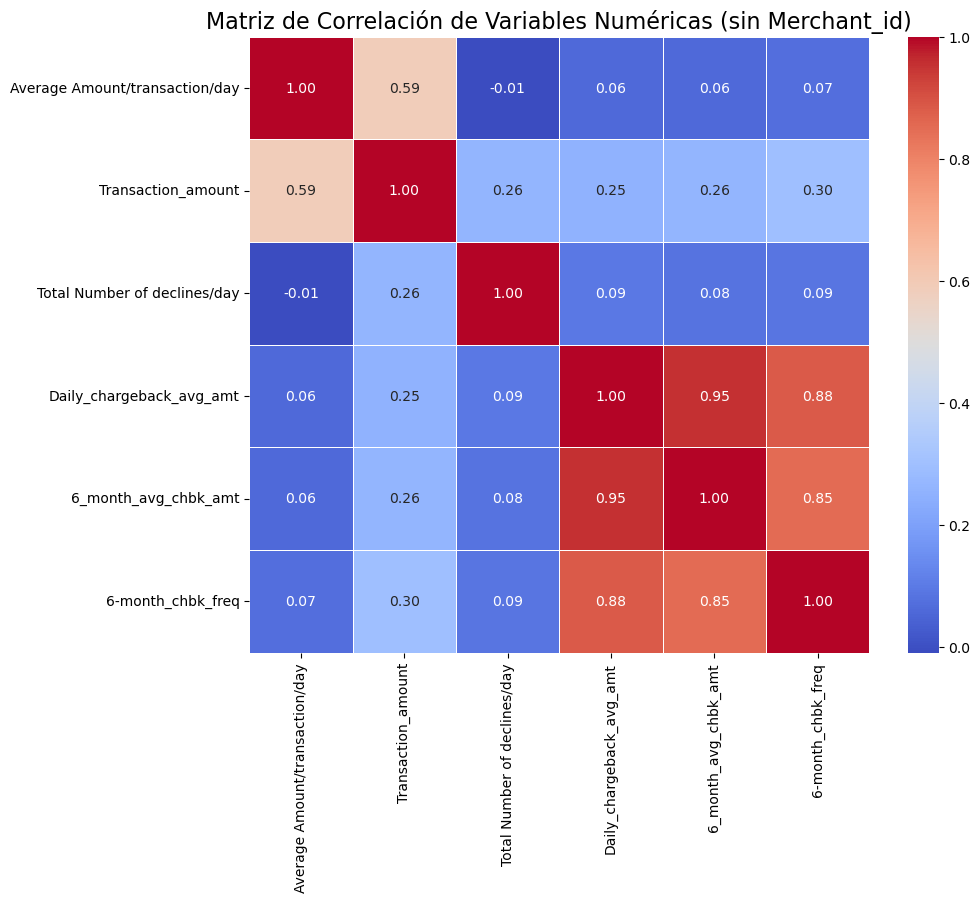


Categorías y frecuencias para la columna 'Is declined':
N: 3018
Y: 57

Categorías y frecuencias para la columna 'isForeignTransaction':
N: 2369
Y: 706

Categorías y frecuencias para la columna 'isHighRiskCountry':
N: 2870
Y: 205

Categorías y frecuencias para la columna 'isFradulent':
N: 2627
Y: 448

Estadísticas para la columna 'Average Amount/transaction/day':
Máximo: 2000.0
Mínimo: 4.011526884
Media: 515.0265563826592
Mediana: 502.5495754
Primer cuartil (Q1): 269.7880474
Tercer cuartil (Q3): 765.272803

Estadísticas para la columna 'Transaction_amount':
Máximo: 108000.0
Mínimo: 0.0
Media: 9876.399209818092
Mediana: 6698.891856
Primer cuartil (Q1): 2408.7811475
Tercer cuartil (Q3): 14422.568935

Estadísticas para la columna 'Is declined':
Valores únicos: ['N' 'Y']
Valor más frecuente (Moda): N

Estadísticas para la columna 'Total Number of declines/day':
Máximo: 20
Mínimo: 0
Media: 0.9573983739837398
Mediana: 0.0
Primer cuartil (Q1): 0.0
Tercer cuartil (Q3): 0.0

Estadísticas para l

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# Cargar datos
df = pd.read_csv('./creditcardcsvpresent.csv')
def analyze_and_clean_df(df):
    # Eliminar columnas vacías
    df_cleaned = df.dropna(axis=1, how='all')
    
    # Excluir la columna 'Merchant_id' de los cálculos
    if 'Merchant_id' in df_cleaned.columns:
        df_cleaned = df_cleaned.drop(columns=['Merchant_id'])
    
    # Mostrar estadísticas columna por columna
    for col in df_cleaned.columns:
        print(f"\nEstadísticas para la columna '{col}':")
        data = df_cleaned[col]
        
        if pd.api.types.is_numeric_dtype(data):
            # Mostrar estadísticas numéricas
            print(f"Máximo: {data.max()}")
            print(f"Mínimo: {data.min()}")
            print(f"Media: {data.mean()}")
            print(f"Mediana: {data.median()}")
            print(f"Primer cuartil (Q1): {data.quantile(0.25)}")
            print(f"Tercer cuartil (Q3): {data.quantile(0.75)}")
        else:
            # Mostrar los valores más frecuentes para columnas categóricas
            print(f"Valores únicos: {data.unique()}")
            print(f"Valor más frecuente (Moda): {data.mode().values[0]}")
    
    return df_cleaned

df = analyze_and_clean_df(df)

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Verificar y convertir valores no numéricos en columnas numéricas
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar columnas con valores constantes
constant_cols = [col for col in numeric_cols if df[col].nunique() <= 1]
df_cleaned = df.drop(columns=constant_cols)

# Asegurarse de que no queden columnas no numéricas
df_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix_cleaned = df_cleaned.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas (sin Merchant_id)', fontsize=16)
plt.show()

# Función para listar y mostrar columnas categóricas
def list_and_print_categorical_columns(df):
    # Seleccionar columnas categóricas
    cat_cols = df.select_dtypes(include=[object]).columns
    
    if len(cat_cols) == 0:
        print("No hay columnas categóricas en el conjunto de datos.")
        return
    
    # Mostrar categorías y frecuencias para cada columna categórica
    for col in cat_cols:
        print(f"\nCategorías y frecuencias para la columna '{col}':")
        frequencies = df[col].value_counts()
        for category, freq in frequencies.items():
            print(f"{category}: {freq}")

list_and_print_categorical_columns(df)

# Función para manejar valores faltantes
def handle_missing_values(df, method='media'):
    # Excluir la columna 'Merchant_id'
    if 'Merchant_id' in df.columns:
        df = df.drop(columns=['Merchant_id'])

    # Seleccionar columnas numéricas
    num_cols = df.select_dtypes(include=[np.number]).columns

    # Seleccionar columnas categóricas
    cat_cols = df.select_dtypes(include=[object]).columns

    # Imputar valores faltantes en columnas numéricas
    for col in num_cols:
        if method == 'media':
            value = df[col].mean()
            df[col] = df[col].fillna(value)
        elif method == 'mediana':
            value = df[col].median()
            df[col] = df[col].fillna(value)

    # Imputar valores faltantes en columnas categóricas con la moda
    for col in cat_cols:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

    return df

df = handle_missing_values(df, method='media')

df_cleaned = analyze_and_clean_df(df)

# Seleccionar solo columnas numéricas
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns

# Verificar y convertir valores no numéricos en columnas numéricas
for col in numeric_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Eliminar columnas con valores constantes
constant_cols = [col for col in numeric_cols if df_cleaned[col].nunique() <= 1]
df_cleaned = df_cleaned.drop(columns=constant_cols)

# Asegurarse de que no queden columnas no numéricas
df_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Manejo de valores faltantes (rellenando con la media)
df_cleaned.fillna(df_cleaned.mean(), inplace=True)

# Escalar los datos
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# --------------------------------
# Detección de Anomalías - Isolation Forest
# --------------------------------
print("\nDetección de anomalías usando Isolation Forest:")

# Instanciar el modelo Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# Ajustar el modelo a los datos
df_scaled['anomaly'] = isolation_forest.fit_predict(df_scaled)

# Añadir columna de anomalías
df_cleaned['anomaly'] = df_scaled['anomaly']

# Separar las observaciones normales (1) de las anómalas (-1)
normal_data = df_cleaned[df_cleaned['anomaly'] == 1]
anomalies = df_cleaned[df_cleaned['anomaly'] == -1]

print(f"Observaciones normales: {normal_data.shape[0]}")
print(f"Anomalías detectadas: {anomalies.shape[0]}")

# Eliminar la columna de anomalías antes de la clasificación
df_cleaned = df_cleaned.drop(columns=['anomaly'])

# --------------------------------
# Clasificación - Random Forest
# --------------------------------
# Supongamos que tenemos una columna llamada 'target' para la clasificación
# Esta columna debe contener las etiquetas de la clasificación (0 o 1, por ejemplo)
# Si no tienes una columna de objetivo, tendrás que crearla

if 'target' not in df_cleaned.columns:
    df_cleaned['target'] = np.random.choice([0, 1], size=len(df_cleaned))  # Simulando una columna de objetivo

# Dividir los datos en características (X) y objetivo (y)
X = df_cleaned.drop(columns=['target'])
y = df_cleaned['target']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar el modelo Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluación del modelo
print("\nEvaluación del modelo Random Forest:")
print(f"Precisión: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))
